In [1]:
%%javascript
$('.nbp-app-bar').toggle()

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import fnmatch
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
from scipy.misc import imresize, imread
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Input
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout
%matplotlib inline
import pandas as pd
import numpy as np
import fnmatch
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
from scipy.misc import imresize, imread
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json,Model
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Input, Convolution2D

%matplotlib inline

/home/jamil/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
    from tensorflow.python.client import device_lib
    print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8039209922863500669
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10656409191
locality {
  bus_id: 1
}
incarnation: 10954625486047126817
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
imagePatches = glob('/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1451_y1051_class0.png
/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1001_class0.png
/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1051_class0.png
/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1101_class0.png
/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1151_class0.png
/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1201_class0.png
/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1251_class0.png
/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1301_class0.png
/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_id

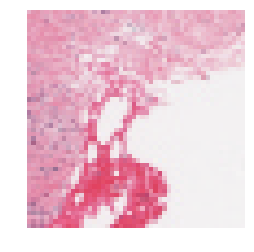

In [5]:
image_name = "/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/9135/1/9135_idx5_x1701_y1851_class1.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    #print (image.shape)
    image = cv2.resize(image, (50,50))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

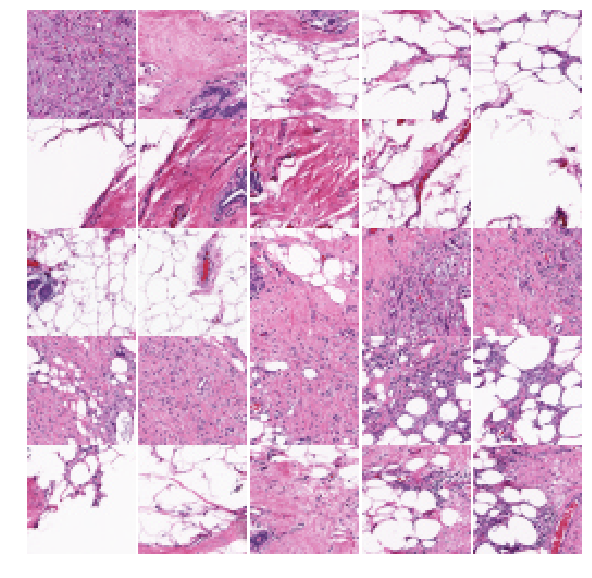

In [6]:
# Plot Multiple Images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    #print (im.shape)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

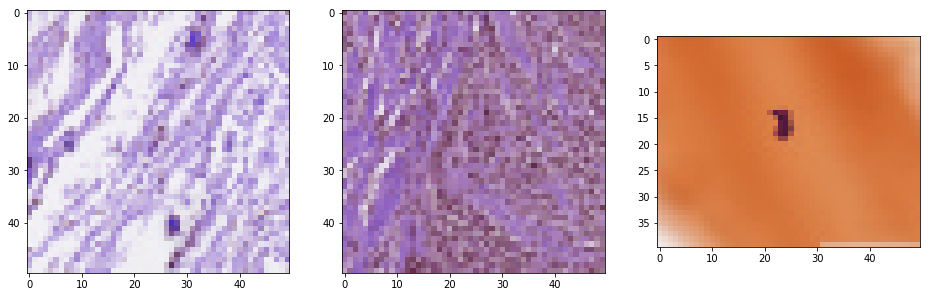

In [7]:
def randomImages(a):
    r = random.sample(a, 4)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
randomImages(imagePatches)

In [8]:
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1451_y1051_class0.png', '/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1001_class0.png', '/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1051_class0.png', '/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1101_class0.png', '/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1151_class0.png'] 

IDC(+)

 ['/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/1/10253_idx5_x501_y351_class1.png', '/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/1/10253_idx5_x501_y401_class1.png', '/media/jamil/SSD SUPER FAST/breast histology/data/IDC_regular_ps50_idx5/10253/1/10253_idx5_x551_y301_class1.png', '/media/jamil/SSD SUPER FAST/breast histology/da

In [9]:
def proc_images(lowerIndex,upperIndex):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """ 
    x = []
    y = []
    WIDTH = 50
    HEIGHT = 50
    for img in imagePatches[lowerIndex:upperIndex]:
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        if img in classZero:
            y.append(0)
        elif img in classOne:
            y.append(1)
        else:
            return
    return x,y

In [10]:
X,Y = proc_images(0,277524)
df = pd.DataFrame()
df["images"]=X
df["labels"]=Y
X2=df["images"]
Y2=df["labels"]
X2=np.array(X2)
imgs0=[]
imgs1=[]
imgs0 = X2[Y2==0] # (0 = no IDC, 1 = IDC)
imgs1 = X2[Y2==1] 

In [11]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X2,Y2)

Total number of images: 277524
Number of IDC(-) Images: 198738
Number of IDC(+) Images: 78786
Percentage of positive images: 28.39%
Image shape (Width, Height, Channels): (50, 50, 3)


In [12]:
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
print(df.head(10))
print("")
print(dict_characters)

                                              images  labels
0  [[[194, 141, 215], [182, 125, 199], [186, 138,...       0
1  [[[206, 164, 226], [196, 154, 224], [211, 175,...       0
2  [[[197, 150, 219], [201, 158, 217], [205, 173,...       0
3  [[[249, 245, 248], [248, 246, 248], [253, 246,...       0
4  [[[249, 247, 249], [249, 247, 249], [249, 247,...       0
5  [[[237, 231, 241], [245, 242, 246], [235, 222,...       0
6  [[[248, 246, 248], [248, 246, 248], [248, 246,...       0
7  [[[175, 120, 212], [145, 88, 175], [132, 72, 1...       0
8  [[[87, 38, 142], [120, 94, 165], [195, 180, 21...       0
9  [[[235, 228, 240], [242, 240, 246], [252, 244,...       0

{0: 'IDC(-)', 1: 'IDC(+)'}


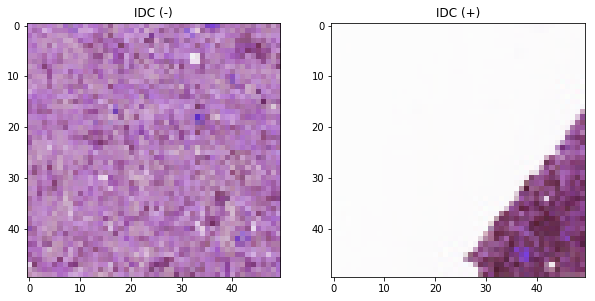

In [13]:
def plotOne(a,b):
    """
    Plot one numpy array
    """
    plt.subplot(1,2,1)
    plt.title('IDC (-)')
    plt.imshow(a[0])
    plt.subplot(1,2,2)
    plt.title('IDC (+)')
    plt.imshow(b[0])
plotOne(imgs0, imgs1) 

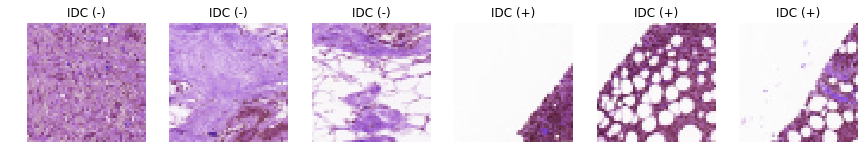

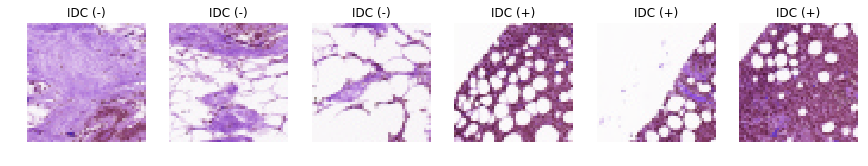

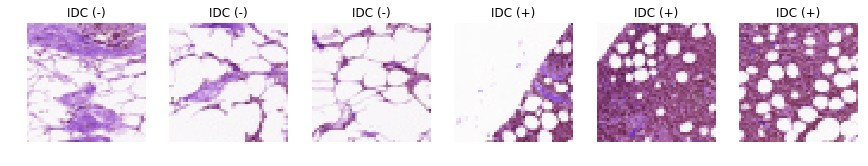

In [14]:
def plotTwo(a,b): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    for row in range(3):
        plt.figure(figsize=(20, 10))
        for col in range(3):
            plt.subplot(1,8,col+1)
            plt.title('IDC (-)')
            plt.imshow(a[0+row+col])
            plt.axis('off')       
            plt.subplot(1,8,col+4)
            plt.title('IDC (+)')
            plt.imshow(b[0+row+col])
            plt.axis('off')
plotTwo(imgs0, imgs1) 

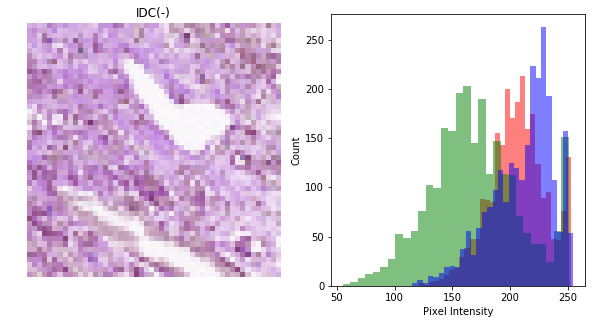

In [15]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('IDC(+)' if Y[1] else 'IDC(-)')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X2[100])

In [16]:
X=np.array(X)
X=X/255.0

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_val, Y_train, Y_val= train_test_split(X_train, Y_train, test_size=0.2) 

# Reduce Sample Size for DeBugging
#X_train = X_train[0:300000] 
#Y_train = Y_train[0:300000]
#X_test = X_test[0:300000] 
#Y_test = Y_test[0:300000]

print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (177615, 50, 50, 3)
Training Data Shape: (44404, 50, 50, 3)
Testing Data Shape: (55505, 50, 50, 3)


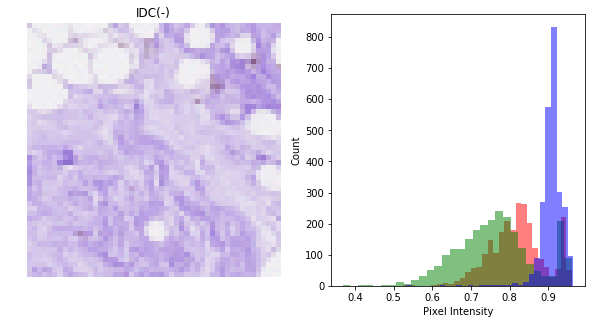

In [17]:
plotHistogram(X_train[100])

In [18]:
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainHot = to_categorical(Y_train, num_classes = 2)
Y_testHot = to_categorical(Y_test, num_classes = 2)

In [19]:
Y_valHot = to_categorical(Y_val, num_classes = 2)

{0: 'IDC(-)', 1: 'IDC(+)'}


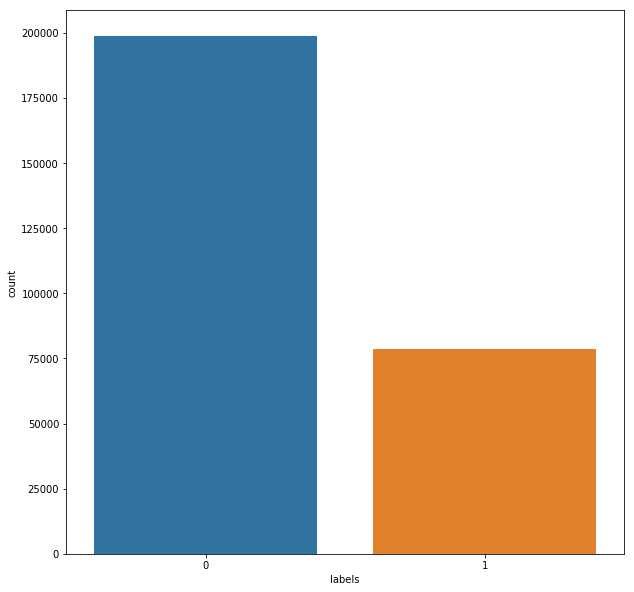

In [20]:
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

{0: 'IDC(-)', 1: 'IDC(+)'}
{0: 'IDC(-)', 1: 'IDC(+)'}
{0: 'IDC(-)', 1: 'IDC(+)'}


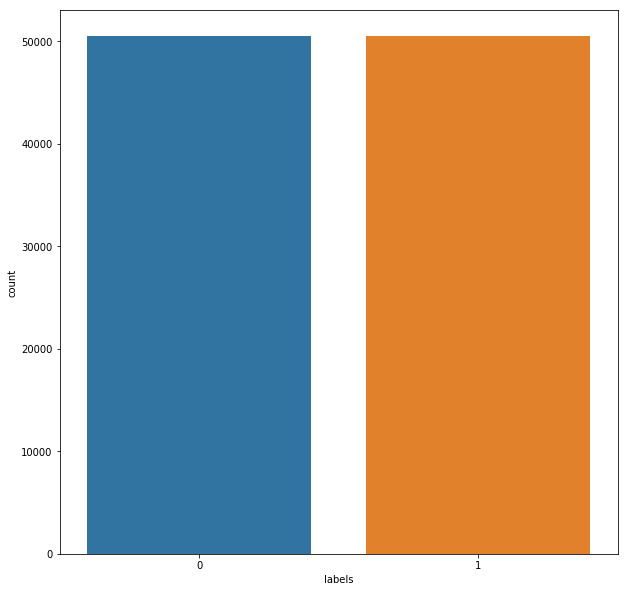

In [21]:
# Deal with imbalanced class sizes below
# Make Data 1D for compatability upsampling methods
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
#update
X_valShape = X_val.shape[1]*X_val.shape[2]*X_val.shape[3]
X_valFlat = X_val.reshape(X_val.shape[0], X_valShape)

#print("X_train Shape: ",X_train.shape)
#print("X_test Shape: ",X_test.shape)
#print("X_trainFlat Shape: ",X_trainFlat.shape)
#print("X_testFlat Shape: ",X_testFlat.shape)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#ros = RandomOverSampler(ratio='auto')
ros = RandomUnderSampler(ratio='auto')
X_trainRos, Y_trainRos = ros.fit_sample(X_trainFlat, Y_train)
X_testRos, Y_testRos = ros.fit_sample(X_testFlat, Y_test)
#update
X_valRos, Y_valRos = ros.fit_sample(X_valFlat, Y_val)


# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
Y_testRosHot = to_categorical(Y_testRos, num_classes = 2)
#update
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)

#print("X_train: ", X_train.shape)
#print("X_trainFlat: ", X_trainFlat.shape)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_testRos Shape: ",X_testRos.shape)
#print("Y_trainRosHot Shape: ",Y_trainRosHot.shape)
#print("Y_testRosHot Shape: ",Y_testRosHot.shape)

for i in range(len(X_trainRos)):
    height, width, channels = 50,50,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_trainRosReshaped Shape: ",X_trainRosReshaped.shape)
#Updte
for i in range(len(X_valRos)):
    height, width, channels = 50,50,3
    X_valRosReshaped = X_valRos.reshape(len(X_valRos),height,width,channels)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_trainRosReshaped Shape: ",X_trainRosReshaped.shape)

for i in range(len(X_testRos)):
    height, width, channels = 50,50,3
    X_testRosReshaped = X_testRos.reshape(len(X_testRos),height,width,channels)
#print("X_testRos Shape: ",X_testRos.shape)
#print("X_testRosReshaped Shape: ",X_testRosReshaped.shape)

dfRos = pd.DataFrame()
dfRos["labels"]=Y_trainRos
labRos = dfRos['labels']
distRos = lab.value_counts()
sns.countplot(labRos)
print(dict_characters)
#update
dfRos = pd.DataFrame()
dfRos["labels"]=Y_valRos
labRos = dfRos['labels']
distRos = lab.value_counts()
sns.countplot(labRos)
print(dict_characters)


dfRos = pd.DataFrame()
dfRos["labels"]=Y_testRos
labRos = dfRos['labels']
distRos = lab.value_counts()
sns.countplot(labRos)
print(dict_characters)

In [22]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)
print("Old Class Weights: ",class_weight)
from sklearn.utils import class_weight
class_weight2 = class_weight.compute_class_weight('balanced', np.unique(Y_trainRos), Y_trainRos)
print("New Class Weights: ",class_weight2)

Old Class Weights:  [0.69853462 1.75922624]
New Class Weights:  [1. 1.]


In [23]:
# Helper Functions  Learning Curves and Confusion Matrix

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [24]:
print (X_trainRosReshaped.shape)
print (Y_trainRosHot.shape)

print (X_testRosReshaped.shape)
print (Y_testRosHot.shape)

#update

print (X_valRosReshaped.shape)
print (Y_valRosHot.shape)

(100962, 50, 50, 3)
(100962, 2)
(31292, 50, 50, 3)
(31292, 2)
(25318, 50, 50, 3)
(25318, 2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       147584    
__________

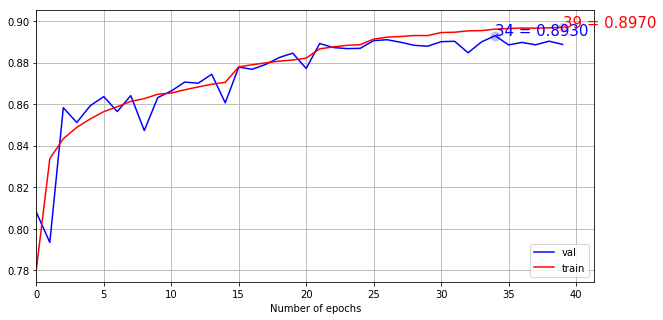

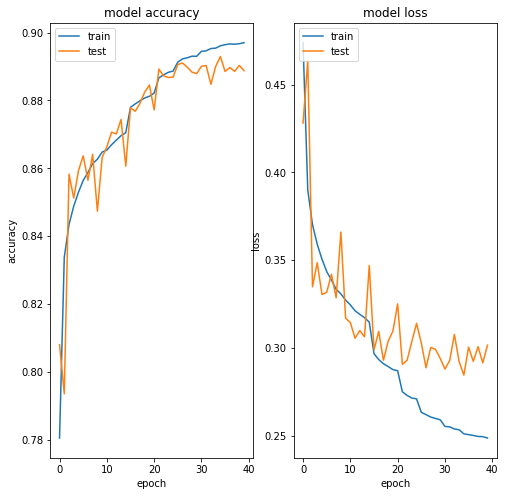

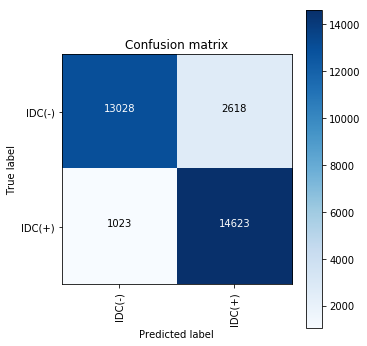

In [25]:
def runKerasCNNAugment(a,b,c,d,e,f,xx,yy):
    """
    Run Keras CNN: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
    """
    batch_size = 128
    num_classes = 2
    epochs = 100
#     img_rows, img_cols = a.shape[1],a.shape[2]
    img_rows,img_cols=50,50
    #input_shape = (img_rows, img_cols, 3)
    
    inp = Input(shape=(img_rows, img_cols, 3))# N.B. TensorFlow back-end expects channel dimension last
    conv_1 = Convolution2D(64, (3,3), padding='same', activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros')(inp)
    conv_2 = Convolution2D(64, (3,3), padding='same', activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros')(conv_1)
    pool_1 = MaxPooling2D(pool_size=(2,2))(conv_2)
    drop_1 = Dropout(0.5)(pool_1)
    conv_3 = Convolution2D(128, (3,3), padding='same', activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros')(drop_1)
    conv_4 = Convolution2D(128, (3,3), padding='same', activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros')(conv_3)
    pool_2 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv_4)
    drop_2 = Dropout(0.5)(pool_2)
    conv_5 = Convolution2D(256, (3,3), padding='same', activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros')(drop_2)
    conv_6 = Convolution2D(256, (3,3), padding='same', activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros')(conv_5)
    pool_3 = MaxPooling2D(pool_size=(2,2))(conv_6)
    drop_3 = Dropout(0.5)(pool_3)
    flat = Flatten()(drop_3)
    hidden1 = Dense(256, activation='relu')(flat) # Hidden ReLU layer
    drop = Dropout(0.5)(hidden1)
    out = Dense(num_classes, activation='softmax')(drop) # Output softmax layer
    
    model = Model(inputs=inp, outputs=out)
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    model.summary()
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
    checkpointer = ModelCheckpoint('model-emnist-cnn.h5', verbose=1, save_best_only=True)
    earlystopper = EarlyStopping(patience=5, verbose=1)
    history = model.fit_generator(datagen.flow(a,b, batch_size),
                        steps_per_epoch=len(a) / 32, epochs=epochs,class_weight=f, validation_data = [xx, yy],
                                  callbacks = [MetricsCheckpoint('logs'),earlystopper,learning_rate_reduction,checkpointer])
    score = model.evaluate(c,d, verbose=0)
    print('\nKeras CNN #1C - accuracy:', score[1],'\n')
    y_pred = model.predict(c)
    map_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
    Y_pred_classes = np.argmax(y_pred,axis=1) 
    Y_true = np.argmax(d,axis=1) 
    plotKerasLearningCurve()
    plt.show()  
    plot_learning_curve(history)
    plt.show()
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
    plt.show()
    
    
runKerasCNNAugment(X_trainRosReshaped, Y_trainRosHot, X_testRosReshaped, Y_testRosHot,1,class_weight2, X_valRosReshaped, Y_valRosHot)    